In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

# **Load data**

In [2]:
## load data ##
df_dir=r'df_clean_raw.pkl'
df= pd.read_pickle(df_dir)

In [3]:
Train_col_list=['order quantity',  
               'Types',
                'SPEC_1st_L1',
                'SPEC_1st_L2', 
                'SPEC_1st_L3',
               'SPEC_1st_N',
                'SPEC_2nd_L1', 
               'SPEC_2nd_L2',
                'SPEC_2nd_L3',
                'Ap_outer_r',
                'Ap_L',
               'cen_outter_r',
                'cen_L',
                'cen_material',
                'Shell_outer_r', 
               'shell_L',
                'shell_material',
                'price per unit']

Display Data

In [4]:
## show load data
pd.set_option('display.max_columns', None)
df.reset_index(inplace=True,drop=True)
df=df[Train_col_list]
q=df['price per unit'].quantile(0.95)
df=df[df['price per unit']<q]
df.to_pickle('df_templet_noCus_noWay.pkl')
df

,order quantity,Types,SPEC_1st_L1,SPEC_1st_L2,SPEC_1st_L3,SPEC_1st_N,SPEC_2nd_L1,SPEC_2nd_L2,SPEC_2nd_L3,Ap_outer_r,Ap_L,cen_outter_r,cen_L,cen_material,Shell_outer_r,shell_L,shell_material,price per unit
0,1,國內終端,X,X,S,20,W,M,R,105.0,136.0,29.0,136.0,SUS420,105.0,87.85,SUS304,53000.000
1,1,國內終端,X,X,S,625,A,M,N,76.2,204.0,44.0,204.0,SUS420,76.2,87.50,AL6061,49500.000
2,1,國內終端,X,X,S,625,A,M,N,76.2,204.0,44.0,204.0,SUS420,76.2,87.50,AL6061,49500.000
3,1,國內設備商,X,X,S,30,W,M,R,128.0,180.5,54.9,180.5,SUS420,128.0,121.00,SUS304,59015.000
4,1,國內終端,X,X,S,625,A,M,N,76.2,204.0,44.0,204.0,SUS420,76.2,87.50,AL6061,49500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,1,國內設備商,A,X,S,40,C,N,R,170.0,241.0,70.0,241.0,SUS420,170.0,127.00,SUS304,80870.200
780,1,國內設備商,A,X,S,40,C,N,R,170.0,241.0,70.0,241.0,SUS420,170.0,127.00,SUS304,81705.615
781,1,國內設備商,A,X,S,40,C,N,R,170.0,241.0,70.0,241.0,SUS420,170.0,127.00,SUS304,80754.150
782,1,國內設備商,A,X,S,40,C,N,R,170.0,241.0,70.0,241.0,SUS420,170.0,127.00,SUS304,80754.150


Split Data into Numerical and Categorical Data

In [5]:
def feature_col_clean_split (dataframe):
    
    from sklearn.preprocessing import MinMaxScaler
    numerical = dataframe.select_dtypes(exclude=['object'])
    numerical.fillna(0,inplace = True)
    numerical.round(4)
    categoric = dataframe.select_dtypes(include=['object'])
    categoric.fillna('NONE',inplace = True)
    dataframe = numerical.merge(categoric, left_index = True, right_index = True)
    
    dummies = pd.get_dummies(categoric,drop_first=True)
    
    data = pd.concat([numerical,dummies],axis=1)
    
    return data,numerical,categoric,dummies

In [6]:
data,num,cat,dum=feature_col_clean_split(df)

C:\Users\James\.conda\envs\data\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
dum.columns

Index(['Types_國內終端', 'Types_國內設備商', 'Types_國外代理商', 'Types_國外終端', 'Types_國外設備商',
       'SPEC_1st_L1_B', 'SPEC_1st_L1_D', 'SPEC_1st_L1_X', 'SPEC_1st_L2_C',
       'SPEC_1st_L2_F', 'SPEC_1st_L2_G', 'SPEC_1st_L2_K', 'SPEC_1st_L2_N',
       'SPEC_1st_L2_S', 'SPEC_1st_L2_X', 'SPEC_1st_L3_H', 'SPEC_1st_L3_M',
       'SPEC_1st_L3_S', 'SPEC_1st_L3_X', 'SPEC_2nd_L1_C', 'SPEC_2nd_L1_W',
       'SPEC_2nd_L2_M', 'SPEC_2nd_L2_N', 'SPEC_2nd_L3_H', 'SPEC_2nd_L3_N',
       'SPEC_2nd_L3_R', 'SPEC_2nd_L3_U', 'SPEC_2nd_L3_X', 'SPEC_2nd_L3_Z',
       'cen_material_SUS304', 'cen_material_SUS420',
       'cen_material_SUS420+SUS304', 'cen_material_SUS630',
       'shell_material_SUS303', 'shell_material_SUS304',
       'shell_material_SUS316', 'shell_material_SUS316L'],
      dtype='object')

In [8]:
data

,order quantity,SPEC_1st_N,Ap_outer_r,Ap_L,cen_outter_r,cen_L,Shell_outer_r,shell_L,price per unit,Types_國內終端,Types_國內設備商,Types_國外代理商,Types_國外終端,Types_國外設備商,SPEC_1st_L1_B,SPEC_1st_L1_D,SPEC_1st_L1_X,SPEC_1st_L2_C,SPEC_1st_L2_F,SPEC_1st_L2_G,SPEC_1st_L2_K,SPEC_1st_L2_N,SPEC_1st_L2_S,SPEC_1st_L2_X,SPEC_1st_L3_H,SPEC_1st_L3_M,SPEC_1st_L3_S,SPEC_1st_L3_X,SPEC_2nd_L1_C,SPEC_2nd_L1_W,SPEC_2nd_L2_M,SPEC_2nd_L2_N,SPEC_2nd_L3_H,SPEC_2nd_L3_N,SPEC_2nd_L3_R,SPEC_2nd_L3_U,SPEC_2nd_L3_X,SPEC_2nd_L3_Z,cen_material_SUS304,cen_material_SUS420,cen_material_SUS420+SUS304,cen_material_SUS630,shell_material_SUS303,shell_material_SUS304,shell_material_SUS316,shell_material_SUS316L
0,1,20,105.0,136.0,29.0,136.0,105.0,87.85,53000.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,1,625,76.2,204.0,44.0,204.0,76.2,87.50,49500.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,625,76.2,204.0,44.0,204.0,76.2,87.50,49500.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,30,128.0,180.5,54.9,180.5,128.0,121.00,59015.000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,1,625,76.2,204.0,44.0,204.0,76.2,87.50,49500.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,1,40,170.0,241.0,70.0,241.0,170.0,127.00,80870.200,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
780,1,40,170.0,241.0,70.0,241.0,170.0,127.00,81705.615,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
781,1,40,170.0,241.0,70.0,241.0,170.0,127.00,80754.150,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
782,1,40,170.0,241.0,70.0,241.0,170.0,127.00,80754.150,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


# Set X and y

In [9]:
y=data['price per unit'].values
X=data.drop(['price per unit'],axis=1).values

# Train Test splitting 

In [10]:
from sklearn.model_selection import train_test_split
x0_train, X_test, y0_train, y_test = train_test_split(X, y, test_size=0.001)
X_train, X_val, y_train, y_val= train_test_split(x0_train, y0_train, test_size=0.2)
print(len(X_train), 'train dataset')
print(len(X_val), 'validation dataset')
print(len(X_test), 'test dataset')

594 train dataset
149 validation dataset
1 test dataset


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)
X_test=scaler.transform(X_test)

## Save Scaler
import joblib
joblib.dump(scaler,'x_scaler_noCus.pkl')

['x_scaler_noCus.pkl']

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
X_train.shape

(594, 45)

In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


model=Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(254,activation='relu'))
model.add(Dense(254,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dense(1016,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dense(508,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(254,activation='relu'))
model.add(Dense(254,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(X_train.shape[1],activation='relu'))

model.add((Dense(1)))
model.compile(optimizer='adam',loss='mse')

In [15]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=100)
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=512,
          epochs=2000,
          verbose=0,
          callbacks=[early_stop]
          )


Epoch 00205: early stopping


In [16]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 864x432 with 0 Axes>

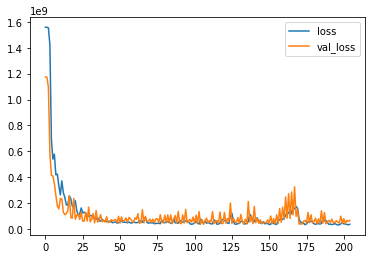

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
losses.plot()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 45)                2070      
_________________________________________________________________
dense_1 (Dense)              (None, 254)               11684     
_________________________________________________________________
dense_2 (Dense)              (None, 254)               64770     
_________________________________________________________________
dense_3 (Dense)              (None, 508)               129540    
_________________________________________________________________
dense_4 (Dense)              (None, 508)               258572    
_________________________________________________________________
dense_5 (Dense)              (None, 508)               258572    
_________________________________________________________________
dense_6 (Dense)              (None, 1016)              5

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [20]:
predictions=model.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test,predictions))

6906.837656249998

In [22]:
mean_absolute_error(y_test,predictions)

6906.837656249998

In [23]:
df['price per unit'].describe()

count      744.000000
mean     30935.522560
std      22914.438357
min        680.960000
25%      10131.544125
50%      25210.125000
75%      49000.000000
max      92792.250000
Name: price per unit, dtype: float64

In [24]:
explained_variance_score(y_test,predictions)

1.0

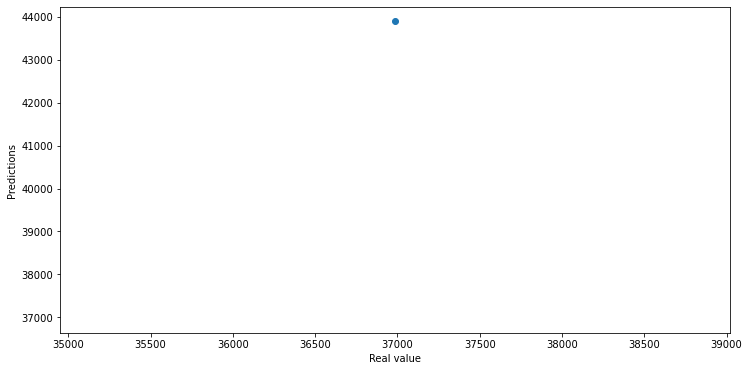

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('Real value')
plt.ylabel('Predictions')
plt.show()

In [26]:
import numpy as np
i=np.random.randint(len(df), size=1)
single_feedthrough=data.drop('price per unit',axis=1).iloc[i]

In [27]:
single_feedthrough=scaler.transform(single_feedthrough.values.reshape(-1,X_train.shape[1]))

In [28]:
model.predict(single_feedthrough)

array([[7789.356]], dtype=float32)

In [29]:
df['price per unit'].iloc[i]

527    9935.325
Name: price per unit, dtype: float64

In [30]:
y_test.shape

(1,)

In [31]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

C:\Users\James\.conda\envs\data\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\James\.conda\envs\data\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


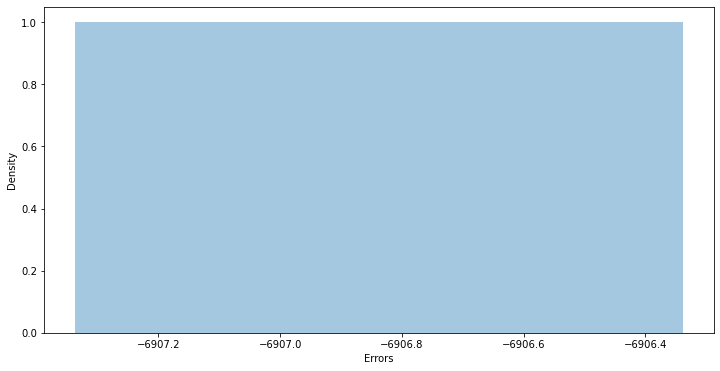

In [32]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.distplot(errors)
plt.xlabel('Errors')
plt.show()

In [33]:
model.save('model_noW_noCus.h5')